In [1]:
import matplotlib.pyplot as plt
import numpy as np


f = open('planets.csv')
planets_1 = f.readlines()
f.close()


with open('planets.csv') as f:
    planets = f.readlines()

# Check that the two lists are equal
planets_1 == planets

True

In [3]:
# Strip the newline character \n from the end of each line. Exclude comments (i.e. lines starting with the symbol #)
planets = [string.strip('\n') for string in planets if string.startswith('#') == False]
# Split each line of the file into a list (the commas separate individual list elements)
planets = [string.split(',') for string in planets]


labels = planets[0]
print(labels)

['pl_name', 'hostname', 'disc_year', 'disc_facility', 'pl_orbsmax', 'pl_bmassj', 'st_mass', 'sy_dist']


In [49]:
sort_list = [(entry[0], entry[5], int(entry[2])) for entry in planets[1:]]

# Sort the list by year
sort_list.sort(key = lambda x: x[2])

print('%-20s %-30s %-10s' %('Planet', 'Mass (M Jup)', 'Year'))
for entry in sort_list:
    print('%-20s %-30s %-10i' %entry)

Planet               Mass (M Jup)                   Year      
HD 114762 b          10.98000                       1989      
PSR B1257+12 c       0.01353                        1992      
PSR B1257+12 d       0.01227                        1992      
PSR B1257+12 b       0.00005                        1994      
51 Peg b             0.46000                        1995      
16 Cyg B b           1.75200                        1996      
47 UMa b             2.45000                        1996      
55 Cnc b             0.80360                        1996      
70 Vir b             7.23000                        1996      
tau Boo b            3.87000                        1996      
ups And b            0.67200                        1996      
rho CrB b            1.04490                        1997      
GJ 876 b             2.11000                        1998      
HD 168443 b          7.48000                        1998      
HD 187123 b          0.48000                        199

In [131]:
#1A
year = {entry[2] for entry in planets[1:]}
year=list(year)
print(year)

['1998', '2019', '2015', '2017', '2009', '2018', '2013', '1999', '2016', '1989', '2003', '2002', '2006', '1994', '2000', '1997', '2021', '1992', '2010', '2022', '2014', '2004', '2005', '2008', '2001', '2007', '2020', '1996', '2011', '1995', '2012']


<Figure size 640x480 with 0 Axes>

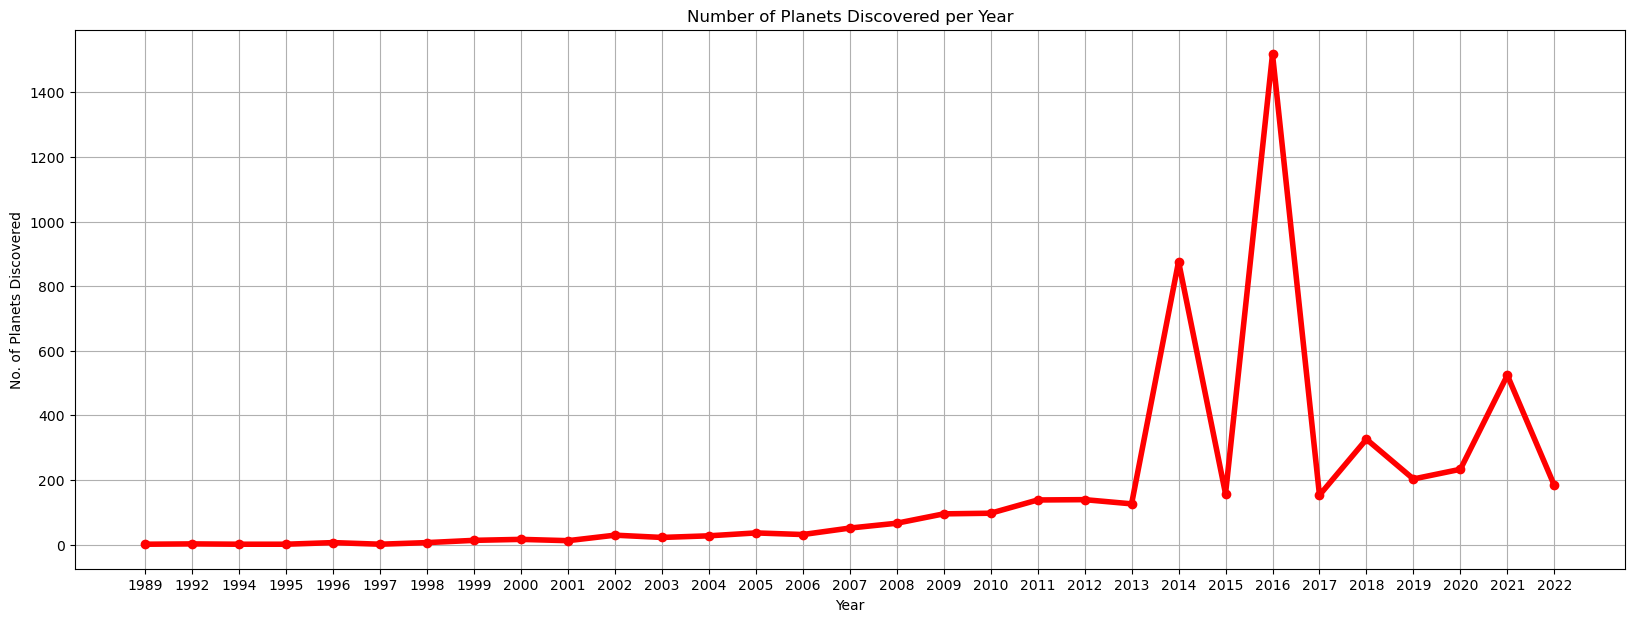

In [132]:
year.sort()
plansinyear = len(year)
discoveries = [0]*plansinyear

for entry in planets[2:]:
    # Find the index corresponding to this year
    ind = year.index(entry[2])
    # Increment the counter
    discoveries[ind] += 1

plt.figure(1)
plt.figure(figsize=[20,7])
plt.plot(year,discoveries,'.-',linewidth='4',markersize='12',color='r')
plt.title('Number of Planets Discovered per Year')
plt.xlabel('Year')
plt.ylabel('No. of Planets Discovered')
plt.grid(True)
plt.show()

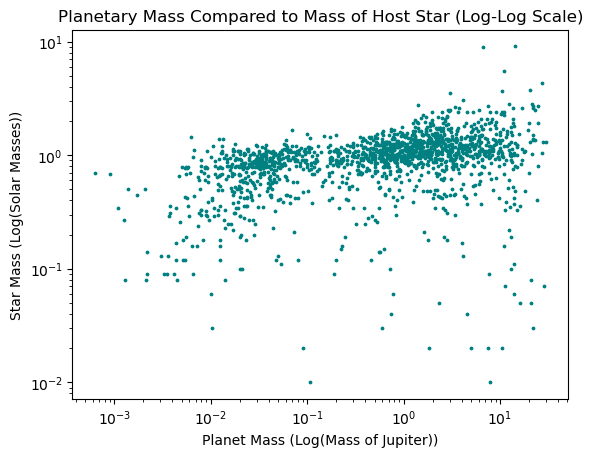

In [211]:
#1B
planet_masses = [float(x[5]) for x in planets[1:] if (x[5] != '') and (x[6]!='')]
star_masses=[float(x[6]) for x in planets[1:] if (x[6]!='') and (x[5]!='')]

plt.title('Planetary Mass Compared to Mass of Host Star (Log-Log Scale)')
plt.scatter(planet_masses, star_masses, s=3, color='teal')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Planet Mass (Log(Mass of Jupiter))')
plt.ylabel('Star Mass (Log(Solar Masses))')
plt.show()

In [188]:
#1C
facility_set={}

for entry in planets[1:]:
    name, facility, discyear = entry[0], entry[3], int(entry[2])
    
    if facility not in facility_set:
        facility_set[facility]={'total_plans': 1,'first_discovery_year': discyear}
    else:
        facility_set[facility]['total_plans']+=1
        if discyear < facility_set[facility]['first_discovery_year']:
            facility_set[facility]['first_discovery_year'] = discyear
                
facilities_by_planets=sorted(facility_set.items(), key=lambda x: x[1]['total_plans'], reverse=True)   
                
print(f"\n{'Facility':<45} {'Planets Discovered':<25} {'Year of First Planet Discovery'}")
print('*'*108)

for name, facilityinf in facilities_by_planets[:10]:
    print(f"{name:<50} {facilityinf['total_plans']:<33} {facilityinf['first_discovery_year']}")


Facility                                      Planets Discovered        Year of First Planet Discovery
************************************************************************************************************
Kepler                                             2708                              2009
K2                                                 537                               2014
La Silla Observatory                               270                               1999
Transiting Exoplanet Survey Satellite (TESS)       253                               2018
Multiple Observatories                             191                               1996
W. M. Keck Observatory                             184                               1998
SuperWASP                                          113                               2007
OGLE                                               81                                2002
HATSouth                                           73              

In [213]:
#Bit cheeky here I think, but it made life easier if we already know that the lowest amount of planets found in top ten is 67

facilities_by_planets = [x for x in facilities_by_planets if x[1]['total_plans'] > 66]
facilities_by_planets.sort(key = lambda x: x[1]['first_discovery_year'])

print(f"\n{'Facility':<45} {'Planets Discovered':<25} {'Year of First Planet Discovery'}")
print('*'*108)
                         
for name, facilityinf in facilities_by_planets:
    print(f"{name:<50} {facilityinf['total_plans']:<33} {facilityinf['first_discovery_year']}")


Facility                                      Planets Discovered        Year of First Planet Discovery
************************************************************************************************************
Multiple Observatories                             191                               1996
W. M. Keck Observatory                             184                               1998
La Silla Observatory                               270                               1999
OGLE                                               81                                2002
HATNet                                             67                                2006
SuperWASP                                          113                               2007
Kepler                                             2708                              2009
HATSouth                                           73                                2012
K2                                                 537             